In [7]:
크레인 인형뽑기 게임
문제 설명
게임개발자인 "죠르디"는 크레인 인형뽑기 기계를 모바일 게임으로 만들려고 합니다.
"죠르디"는 게임의 재미를 높이기 위해 화면 구성과 규칙을 다음과 같이 게임 로직에 반영하려고 합니다.

crane_game_101.png

게임 화면은 "1 x 1" 크기의 칸들로 이루어진 "N x N" 크기의 정사각 격자이며 위쪽에는 크레인이 있고 오른쪽에는 바구니가 있습니다. (위 그림은 "5 x 5" 크기의 예시입니다). 각 격자 칸에는 다양한 인형이 들어 있으며 인형이 없는 칸은 빈칸입니다. 모든 인형은 "1 x 1" 크기의 격자 한 칸을 차지하며 격자의 가장 아래 칸부터 차곡차곡 쌓여 있습니다. 게임 사용자는 크레인을 좌우로 움직여서 멈춘 위치에서 가장 위에 있는 인형을 집어 올릴 수 있습니다. 집어 올린 인형은 바구니에 쌓이게 되는 데, 이때 바구니의 가장 아래 칸부터 인형이 순서대로 쌓이게 됩니다. 다음 그림은 [1번, 5번, 3번] 위치에서 순서대로 인형을 집어 올려 바구니에 담은 모습입니다.

crane_game_102.png

만약 같은 모양의 인형 두 개가 바구니에 연속해서 쌓이게 되면 두 인형은 터뜨려지면서 바구니에서 사라지게 됩니다. 위 상태에서 이어서 [5번] 위치에서 인형을 집어 바구니에 쌓으면 같은 모양 인형 두 개가 없어집니다.

crane_game_103.gif

크레인 작동 시 인형이 집어지지 않는 경우는 없으나 만약 인형이 없는 곳에서 크레인을 작동시키는 경우에는 아무런 일도 일어나지 않습니다. 또한 바구니는 모든 인형이 들어갈 수 있을 만큼 충분히 크다고 가정합니다. (그림에서는 화면표시 제약으로 5칸만으로 표현하였음)

게임 화면의 격자의 상태가 담긴 2차원 배열 board와 인형을 집기 위해 크레인을 작동시킨 위치가 담긴 배열 moves가 매개변수로 주어질 때, 크레인을 모두 작동시킨 후 터트려져 사라진 인형의 개수를 return 하도록 solution 함수를 완성해주세요.

[제한사항]
board 배열은 2차원 배열로 크기는 "5 x 5" 이상 "30 x 30" 이하입니다.
board의 각 칸에는 0 이상 100 이하인 정수가 담겨있습니다.
0은 빈 칸을 나타냅니다.
1 ~ 100의 각 숫자는 각기 다른 인형의 모양을 의미하며 같은 숫자는 같은 모양의 인형을 나타냅니다.
moves 배열의 크기는 1 이상 1,000 이하입니다.
moves 배열 각 원소들의 값은 1 이상이며 board 배열의 가로 크기 이하인 자연수입니다.
입출력 예
board	moves	result
[[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]	[1,5,3,5,1,2,1,4]	4
입출력 예에 대한 설명
입출력 예 #1

인형의 처음 상태는 문제에 주어진 예시와 같습니다. 크레인이 [1, 5, 3, 5, 1, 2, 1, 4] 번 위치에서 차례대로 인형을 집어서 바구니에 옮겨 담은 후, 상태는 아래 그림과 같으며 바구니에 담는 과정에서 터트려져 사라진 인형은 4개 입니다.

crane_game_104.jpg

SyntaxError: invalid decimal literal (2652528660.py, line 8)

In [55]:
#test code
from collections import deque

board = [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]
moves = [1,5,3,5,1,2,1,4]

def solution(board, moves):
    moves = deque(moves)
    buckets = []
    cnt = 0
    while moves:
#moves의 앞에서부터 순서대로 위치 이동
        move = moves.popleft()

#해당 위치에서 0이 아닌 숫자가 나올 때까지 아래 방향으로 탐색
        for i in range(len(board)): 
            doll = board[i][move-1]

#바닥에 도착하기 전 0이 아닌 숫자 발견 시, 
    #해당 위치 0으로 바꿈
    #해당 숫자 바구니(buckets)에 담음
            if doll != 0:
                board[i][move-1] = 0

#바구니(buckets) 가장 위에 있는 숫자와 비교해서
    #서로 다른 숫자이면 쌓기
    #같은 숫자이면 사라지게 함
    #사라진 인형의 개수 증가시킴
                if buckets and buckets[-1] == doll:
                    buckets.pop()
                    cnt += 2
                else:
                    buckets.append(doll)
                break

    return cnt

print(solution(board, moves))
 


4


In [ ]:
#답안
from collections import deque
def solution(board, moves):
    moves = deque(moves)
    buckets = []
    answer = 0
    while moves:
        move = moves.popleft()
        for i in range(len(board)):
            doll = board[i][move-1]
            if doll != 0:
                board[i][move-1] = 0
                if buckets and buckets[-1] == doll:
                    buckets.pop()
                    answer += 2
                else:
                    buckets.append(doll)
                break

    return answer

In [ ]:
프린터
문제 설명
일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.

1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.
예를 들어, 4개의 문서(A, B, C, D)가 순서대로 인쇄 대기목록에 있고 중요도가 2 1 3 2 라면 C D A B 순으로 인쇄하게 됩니다.

내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 알고 싶습니다. 위의 예에서 C는 1번째로, A는 3번째로 인쇄됩니다.

현재 대기목록에 있는 문서의 중요도가 순서대로 담긴 배열 priorities와 내가 인쇄를 요청한 문서가 현재 대기목록의 어떤 위치에 있는지를 알려주는 location이 매개변수로 주어질 때, 내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 return 하도록 solution 함수를 작성해주세요.

제한사항
현재 대기목록에는 1개 이상 100개 이하의 문서가 있습니다.
인쇄 작업의 중요도는 1~9로 표현하며 숫자가 클수록 중요하다는 뜻입니다.
location은 0 이상 (현재 대기목록에 있는 작업 수 - 1) 이하의 값을 가지며 대기목록의 가장 앞에 있으면 0, 두 번째에 있으면 1로 표현합니다.
입출력 예
priorities	location	return
[2, 1, 3, 2]	2	1
[1, 1, 9, 1, 1, 1]	0	5
입출력 예 설명
예제 #1

문제에 나온 예와 같습니다.

예제 #2

6개의 문서(A, B, C, D, E, F)가 인쇄 대기목록에 있고 중요도가 1 1 9 1 1 1 이므로 C D E F A B 순으로 인쇄합니다.

In [ ]:
#실패
from collections import deque

priorities = [2, 1, 3, 2]
location = 2

priorities = deque(priorities)
cnt = 1
flag = True

while flag:
    temp = priorities.pop()
    for i in range(len(priorities)):
        if priorities[i] > temp:
            priorities.appendleft(temp)
            location += 1
            location %= len(priorities)
            cnt += 1
        else:
            if location == len(priorities)-1:
                flag = False
                print(cnt)

#pop 한다
#pop 값보다 큰게 있는지 본다
    #있으면 다시 넣는다
    #없으면 인쇄한다

1
1


In [ ]:
from collections import deque

priorities = [2, 1, 3, 2]
location = 2

priorities = [1, 1, 9, 1, 1, 1]
location = 0


dq = deque(priorities)
answer = 0

while True:
    if dq[0] < max(dq):
        dq.rotate(-1)       
    else:
        dq.popleft()
        answer += 1
        if location == 0:
            break
    location -= 1
    if location < 0:
        location += len(dq)

print(answer)


5


In [ ]:
#답안
from collections import deque
def solution(priorities, location):
    dq = deque(priorities)
    answer = 0

    while True:
        if dq[0] < max(dq):
            dq.rotate(-1)       
        else:
            dq.popleft()
            answer += 1
            if location == 0:
                break
        location -= 1
        if location < 0:
            location += len(dq)

    return answer

In [ ]:
연산자 끼워넣기
시간 제한	메모리 제한	제출	정답	맞힌 사람	정답 비율
2 초	512 MB	68153	35663	22735	49.443%
문제
N개의 수로 이루어진 수열 A1, A2, ..., AN이 주어진다. 또, 수와 수 사이에 끼워넣을 수 있는 N-1개의 연산자가 주어진다. 연산자는 덧셈(+), 뺄셈(-), 곱셈(×), 나눗셈(÷)으로만 이루어져 있다.

우리는 수와 수 사이에 연산자를 하나씩 넣어서, 수식을 하나 만들 수 있다. 이때, 주어진 수의 순서를 바꾸면 안 된다.

예를 들어, 6개의 수로 이루어진 수열이 1, 2, 3, 4, 5, 6이고, 주어진 연산자가 덧셈(+) 2개, 뺄셈(-) 1개, 곱셈(×) 1개, 나눗셈(÷) 1개인 경우에는 총 60가지의 식을 만들 수 있다. 예를 들어, 아래와 같은 식을 만들 수 있다.

1+2+3-4×5÷6
1÷2+3+4-5×6
1+2÷3×4-5+6
1÷2×3-4+5+6
식의 계산은 연산자 우선 순위를 무시하고 앞에서부터 진행해야 한다. 또, 나눗셈은 정수 나눗셈으로 몫만 취한다. 음수를 양수로 나눌 때는 C++14의 기준을 따른다. 즉, 양수로 바꾼 뒤 몫을 취하고, 그 몫을 음수로 바꾼 것과 같다. 이에 따라서, 위의 식 4개의 결과를 계산해보면 아래와 같다.

1+2+3-4×5÷6 = 1
1÷2+3+4-5×6 = 12
1+2÷3×4-5+6 = 5
1÷2×3-4+5+6 = 7
N개의 수와 N-1개의 연산자가 주어졌을 때, 만들 수 있는 식의 결과가 최대인 것과 최소인 것을 구하는 프로그램을 작성하시오.

입력
첫째 줄에 수의 개수 N(2 ≤ N ≤ 11)가 주어진다. 둘째 줄에는 A1, A2, ..., AN이 주어진다. (1 ≤ Ai ≤ 100) 셋째 줄에는 합이 N-1인 4개의 정수가 주어지는데, 차례대로 덧셈(+)의 개수, 뺄셈(-)의 개수, 곱셈(×)의 개수, 나눗셈(÷)의 개수이다. 

출력
첫째 줄에 만들 수 있는 식의 결과의 최댓값을, 둘째 줄에는 최솟값을 출력한다. 연산자를 어떻게 끼워넣어도 항상 -10억보다 크거나 같고, 10억보다 작거나 같은 결과가 나오는 입력만 주어진다. 또한, 앞에서부터 계산했을 때, 중간에 계산되는 식의 결과도 항상 -10억보다 크거나 같고, 10억보다 작거나 같다.

예제 입력 1 
2
5 6
0 0 1 0
예제 출력 1 
30
30
예제 입력 2 
3
3 4 5
1 0 1 0
예제 출력 2 
35
17
예제 입력 3 
6
1 2 3 4 5 6
2 1 1 1
예제 출력 3 
54
-24
힌트
세 번째 예제의 경우에 다음과 같은 식이 최댓값/최솟값이 나온다.

최댓값: 1-2÷3+4+5×6
최솟값: 1+2+3÷4-5×6

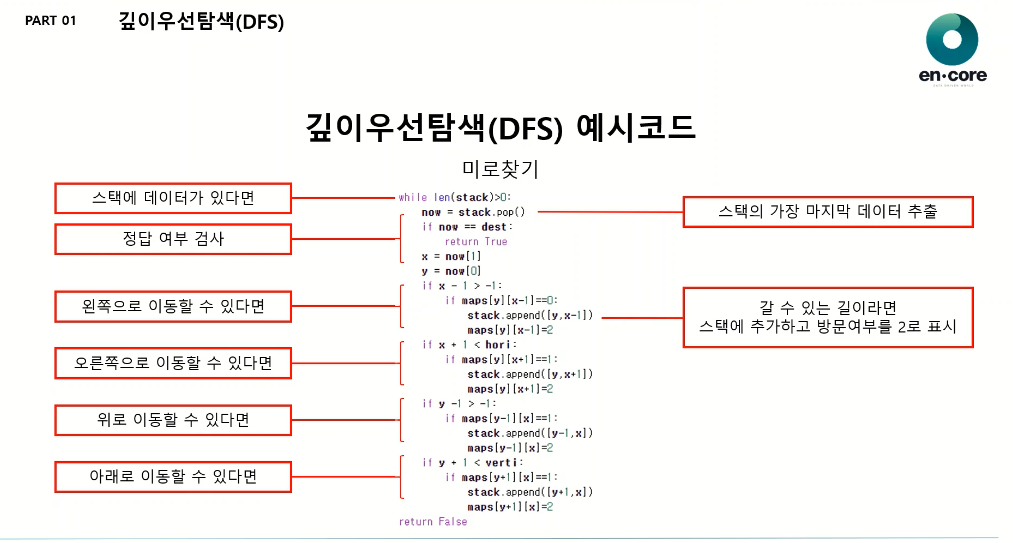

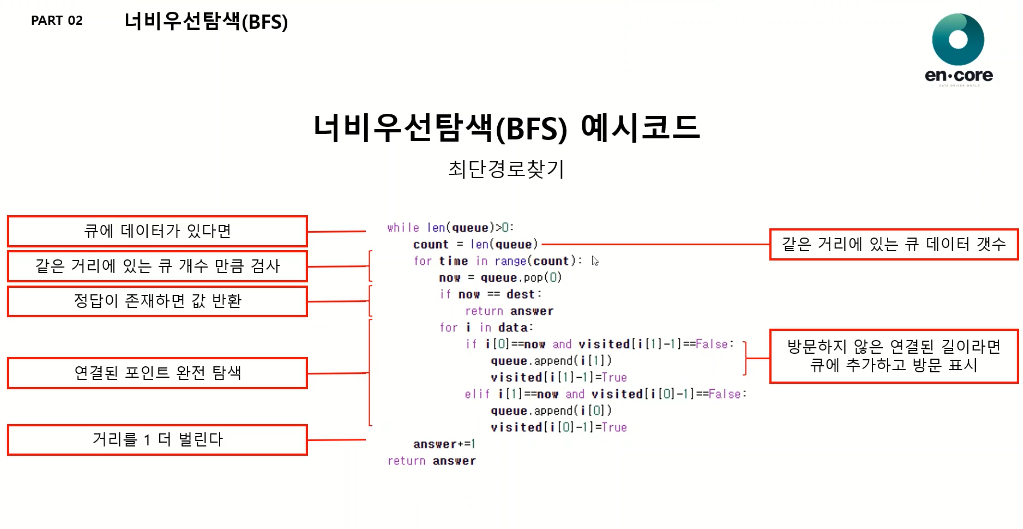

In [28]:
#N입력받음
#수열 입력
#연산자 입력

N = 2
seq = [5, 6]
opr = [0, 0, 1, 0] # 0+ 1- 2* 3/

N = 3
seq = [3, 4, 5]
opr = [1, 0, 1, 0]

N = 6
seq = [1, 2, 3, 4, 5, 6]
opr = [2, 1, 1, 1]

answer = []

#dfs 탐색
def Dfs(idx, res, opr):
    #졸료 조건
    if idx == N-1:
        answer.append(res)
        return
    
    if opr[0]:
        Dfs(idx+1, res+seq[idx+1], [opr[0]-1, opr[1], opr[2], opr[3]])
    if opr[1]:
        Dfs(idx+1, res-seq[idx+1], [opr[0], opr[1]-1, opr[2], opr[3]])
    if opr[2]:
        Dfs(idx+1, res*seq[idx+1], [opr[0], opr[1], opr[2]-1, opr[3]])
    if opr[3]:
        if res<0:
            res = abs(res) // seq[idx+1]
            res *= -1
            Dfs(idx+1, res, [opr[0], opr[1], opr[2], opr[3]-1])
        else: 
            res = res // seq[idx+1]
            Dfs(idx+1, res, [opr[0], opr[1], opr[2], opr[3]-1])

Dfs(0, seq[0], opr)
print(answer)
print(max(answer))
print(min(answer))


[1, 0, 3, -2, -24, -1, 3, 0, 0, 6, 30, 6, 1, -4, 1, 7, 1, 3, 0, 19, 12, -9, 3, 5, 5, 6, 2, 7, 30, 6, 1, 6, 11, 54, 26, 11, 0, -5, 1, 6, 0, 2, 1, 6, 11, 3, 5, 7, 12, 29, 24, 1, 11, 13, 36, 11, -1, 3, 5, 7]
54
-24


In [21]:
N = int(input())
seq = list(map(int, input().split()))
opr = list(map(int, input().split()))
answer = []

#dfs 탐색
def Dfs(idx, res, opr):
    #종료 조건
    if idx == N-1:
        answer.append(res)
        return
    
    #재귀
    if opr[0]:
        Dfs(idx+1, res+seq[idx+1], [opr[0]-1, opr[1], opr[2], opr[3]])
    if opr[1]:
        Dfs(idx+1, res-seq[idx+1], [opr[0], opr[1]-1, opr[2], opr[3]])
    if opr[2]:
        Dfs(idx+1, res*seq[idx+1], [opr[0], opr[1], opr[2]-1, opr[3]])
    if opr[3]:
        if res<0:
            res = abs(res) // seq[idx+1]
            res *= -1
            Dfs(idx+1, res, [opr[0], opr[1], opr[2], opr[3]-1])
        else: 
            res = res // seq[idx+1]
            Dfs(idx+1, res, [opr[0], opr[1], opr[2], opr[3]-1])

Dfs(0, seq[0], opr)
print(max(answer))
print(min(answer))

2
5 6
0 0 1 0
30
30


In [ ]:
체스판 다시 칠하기
시간 제한	메모리 제한	제출	정답	맞힌 사람	정답 비율
2 초	128 MB	75278	35973	28945	47.891%
문제
지민이는 자신의 저택에서 MN개의 단위 정사각형으로 나누어져 있는 M×N 크기의 보드를 찾았다. 어떤 정사각형은 검은색으로 칠해져 있고, 나머지는 흰색으로 칠해져 있다. 지민이는 이 보드를 잘라서 8×8 크기의 체스판으로 만들려고 한다.

체스판은 검은색과 흰색이 번갈아서 칠해져 있어야 한다. 구체적으로, 각 칸이 검은색과 흰색 중 하나로 색칠되어 있고, 변을 공유하는 두 개의 사각형은 다른 색으로 칠해져 있어야 한다. 따라서 이 정의를 따르면 체스판을 색칠하는 경우는 두 가지뿐이다. 하나는 맨 왼쪽 위 칸이 흰색인 경우, 하나는 검은색인 경우이다.

보드가 체스판처럼 칠해져 있다는 보장이 없어서, 지민이는 8×8 크기의 체스판으로 잘라낸 후에 몇 개의 정사각형을 다시 칠해야겠다고 생각했다. 당연히 8*8 크기는 아무데서나 골라도 된다. 지민이가 다시 칠해야 하는 정사각형의 최소 개수를 구하는 프로그램을 작성하시오.

입력
첫째 줄에 N과 M이 주어진다. N과 M은 8보다 크거나 같고, 50보다 작거나 같은 자연수이다. 둘째 줄부터 N개의 줄에는 보드의 각 행의 상태가 주어진다. B는 검은색이며, W는 흰색이다.

출력
첫째 줄에 지민이가 다시 칠해야 하는 정사각형 개수의 최솟값을 출력한다.

예제 입력 1 
8 8
WBWBWBWB
BWBWBWBW
WBWBWBWB
BWBBBWBW
WBWBWBWB
BWBWBWBW
WBWBWBWB
BWBWBWBW
예제 출력 1 
1
예제 입력 2 
10 13
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
예제 출력 2 
12
예제 입력 3 
8 8
BWBWBWBW
WBWBWBWB
BWBWBWBW
WBWBWBWB
BWBWBWBW
WBWBWBWB
BWBWBWBW
WBWBWBWB
예제 출력 3 
0
예제 입력 4 
9 23
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBB
BBBBBBBBBBBBBBBBBBBBBBW
예제 출력 4 
31
예제 입력 5 
10 10
BBBBBBBBBB
BBWBWBWBWB
BWBWBWBWBB
BBWBWBWBWB
BWBWBWBWBB
BBWBWBWBWB
BWBWBWBWBB
BBWBWBWBWB
BWBWBWBWBB
BBBBBBBBBB
예제 출력 5 
0
예제 입력 6 
8 8
WBWBWBWB
BWBWBWBW
WBWBWBWB
BWBBBWBW
WBWBWBWB
BWBWBWBW
WBWBWWWB
BWBWBWBW
예제 출력 6 
2
예제 입력 7 
11 12
BWWBWWBWWBWW
BWWBWBBWWBWW
WBWWBWBBWWBW
BWWBWBBWWBWW
WBWWBWBBWWBW
BWWBWBBWWBWW
WBWWBWBBWWBW
BWWBWBWWWBWW
WBWWBWBBWWBW
BWWBWBBWWBWW
WBWWBWBBWWBW
예제 출력 7 
15
출처
문제를 번역한 사람: baekjoon
데이터를 추가한 사람: jh05013
문제를 다시 작성한 사람: jh05013

In [44]:
n, m = 10, 13
board = ['WBWBWBWB',
        'BWBWBWBW',
        'WBWBWBWB',
        'BWBBBWBW',
        'WBWBWBWB',
        'BWBWBWBW',
        'WBWBWBWB',
        'BWBWBWBW']

board = ['BWBWBWBW',
'WBWBWBWB',
'BWBWBWBW',
'WBWBWBWB',
'BWBWBWBW',
'WBWBWBWB',
'BWBWBWBW',
'WBWBWBWB']

board = ['BBBBBBBBWBWBW',
'BBBBBBBBBWBWB',
'BBBBBBBBWBWBW',
'BBBBBBBBBWBWB',
'BBBBBBBBWBWBW',
'BBBBBBBBBWBWB',
'BBBBBBBBWBWBW',
'BBBBBBBBBWBWB',
'WWWWWWWWWWBWB',
'WWWWWWWWWWBWB',]

# for i in range(m):
#     board.append(input())

def Color(board, x, y):
    draw_b = 0
    draw_w = 0
    for i in range(x, x+8):
        for j in range(y, y+8):
            if (i+j)%2 == 0:
                if board[i][j] != 'B':
                    draw_b += 1
                if board[i][j] != 'W':
                    draw_w += 1
            else:
                if board[i][j] != 'W':
                    draw_b += 1
                if board[i][j] != 'B':
                    draw_w += 1
    return min(draw_b, draw_w)

res = []
for x in range(n-7):
    for y in range(m-7):
        res.append(Color(board, x, y))

print(min(res))


12


In [57]:
n, m = map(int, input().split())
origin_board = []

for idx in range(n):
    origin_board.append(input())

res = []
    
def Color(board, x, y):
    draw_b = 0
    draw_w = 0
    for i in range(x, x+8):
        for j in range(y, y+8):
            if (i+j)%2 == 0:
                if board[i][j] != 'B':
                    draw_b += 1
                if board[i][j] != 'W':
                    draw_w += 1
            else:
                if board[i][j] != 'W':
                    draw_b += 1
                if board[i][j] != 'B':
                    draw_w += 1
    return min(draw_b, draw_w)

for x in range(n-7):
    for y in range(m-7):
        res.append(Color(origin_board, x, y))

print(min(res))

8 8
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
32
